# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [56]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
customers


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [5]:
customers.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [31]:
customers['sum'] = customers['Fresh']+ customers['Milk']+ customers['Grocery']+ customers['Frozen']+ customers['Detergents_Paper']+ customers['Delicassen']
customers['sum']
#sumo todas las columnas para obtener el gasto por cliente

0      34112
1      33266
2      36610
3      27381
4      46100
       ...  
435    73302
436    48372
437    77407
438    17834
439     7589
Name: sum, Length: 440, dtype: int64

In [33]:
customers= customers.sort_values(by=['sum'])
#ordeno por la suma(para lo de pareto)

In [34]:
customers['sum2'] = customers['sum'].cumsum()
customers['sum2']
#hago la acumulada

154         904
97         3062
98         5538
355        9023
131       12753
         ...   
61     13851043
183    14036726
181    14226895
47     14419609
85     14619500
Name: sum2, Length: 440, dtype: int64

In [35]:
Q80 = customers['sum2'][int(439 * 0.8)]
Q80
#veo cuanto an gastado el 80% de los que menos gastan

9656572

In [43]:
ingreso_total = customers['sum2'].max()
ingreso_total

14619500

In [44]:
ingreso_del_20mayor =  customers['sum2'].max() - Q80
ingreso_del_20mayor

4962928

In [45]:
porcen_20mayor = ingreso_del_20mayor/ingreso_total
porcen_20mayor
#pue no. el 20% que más gasta, supone el 34% de los ingresos

0.3394731693970382

In [53]:
customers.drop(['sum', 'sum2'], axis = 1, inplace= True)

In [54]:
customers.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


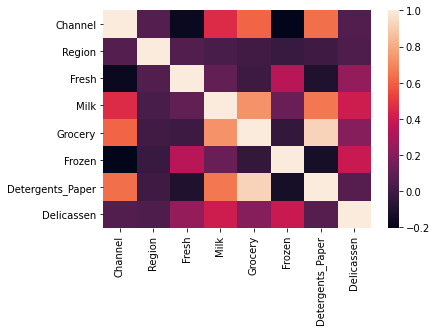

In [59]:
sns.heatmap(customers.corr());


In [64]:
from scipy import stats
from scipy.stats import zscore

In [86]:
z_scores = stats.zscore(customers)


abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
filtered_entries

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [89]:
set(customers.Channel)

{1, 2}

In [90]:
set(customers.Region)

{1, 2, 3}

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [85]:
customers_sinOL = customers[filtered_entries]
customers_sinOL.shape

(414, 8)

In [84]:
customers.shape

(440, 8)

In [93]:
customers_CT = pd.get_dummies(customers_sinOL, columns=['Region', 'Channel'], sparse=False, drop_first=True)
customers_CT

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_2,Region_3,Channel_2
154,622,55,137,75,7,8,0,1,0
97,403,254,610,774,54,63,0,1,0
98,503,112,778,895,56,132,0,1,0
355,190,727,2012,245,184,127,0,1,0
131,2101,589,314,346,70,310,0,1,0
...,...,...,...,...,...,...,...,...,...
427,31012,16687,5429,15082,439,1163,0,1,0
49,4967,21412,28921,1798,13583,1163,0,1,1
435,29703,12051,16027,13135,182,2204,0,1,0
437,14531,15488,30243,437,14841,1867,0,1,1


# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [96]:
# Your import here:

from sklearn.preprocessing import StandardScaler

customers_scale=pd.DataFrame(StandardScaler().fit_transform(customers_CT), columns = customers_CT.columns)
customers_scale

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_2,Region_3,Channel_2
0,-1.028795,-1.058627,-1.035464,-0.849558,-0.738383,-1.011523,-0.349215,0.623908,-0.676570
1,-1.051126,-1.014892,-0.962112,-0.609613,-0.723718,-0.966290,-0.349215,0.623908,-0.676570
2,-1.040929,-1.046099,-0.936059,-0.568077,-0.723094,-0.909544,-0.349215,0.623908,-0.676570
3,-1.072844,-0.910939,-0.744692,-0.791203,-0.683154,-0.913656,-0.349215,0.623908,-0.676570
4,-0.877990,-0.941268,-1.008015,-0.756532,-0.718726,-0.763153,-0.349215,0.623908,-0.676570
...,...,...,...,...,...,...,...,...,...
409,2.069900,2.596629,-0.214790,4.301895,-0.603587,-0.061632,-0.349215,0.623908,-0.676570
410,-0.585760,3.635054,3.428308,-0.258104,3.497722,-0.061632,-0.349215,0.623908,1.478044
411,1.936429,1.577764,1.428729,3.633548,-0.683778,0.794505,-0.349215,0.623908,-0.676570
412,0.389426,2.333122,3.633321,-0.725295,3.890255,0.517350,-0.349215,0.623908,1.478044


In [119]:
customers_scale.shape

(414, 9)

In [120]:
customers_CT.shape

(414, 9)

In [130]:
customers_CT=customers_CT.reset_index()

In [131]:
customers_scale=customers_scale.reset_index()

In [136]:
customers_scale[['Region_2', 'Region_3', 'Channel_2']] = customers_CT[['Region_2','Region_3','Channel_2']]

In [137]:
customers_scale.isnull().sum()

index               0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
Region_2            0
Region_3            0
Channel_2           0
dtype: int64

In [138]:
customers_CT.isnull().sum()

index               0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
Region_2            0
Region_3            0
Channel_2           0
dtype: int64

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [139]:
from sklearn.cluster import KMeans


In [140]:
kmeans=KMeans(n_clusters=4)

In [141]:
clusters=kmeans.fit(customers_scale)

In [144]:
customers_sinOL['labels']=clusters.fit_predict(customers_scale)

customers_sinOL

<ipython-input-144-f9e5b7f8db3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_sinOL['labels']=clusters.fit_predict(customers_scale)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
154,1,3,622,55,137,75,7,8,0
97,1,3,403,254,610,774,54,63,0
98,1,3,503,112,778,895,56,132,0
355,1,3,190,727,2012,245,184,127,0
131,1,3,2101,589,314,346,70,310,0
...,...,...,...,...,...,...,...,...,...
427,1,3,31012,16687,5429,15082,439,1163,1
49,2,3,4967,21412,28921,1798,13583,1163,1
435,1,3,29703,12051,16027,13135,182,2204,1
437,2,3,14531,15488,30243,437,14841,1867,1


Count the values in `labels`.

In [153]:
customers_sinOL['labels'].value_counts()


1    105
3    104
0    103
2    102
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with AgglomerativeClustering

Now let's cluster the data using AgglomerativeClustering. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_AC']`. Now your original data have two labels, one from K-Means and the other from AgglomerativeClustering.

In [155]:
from scipy.cluster.hierarchy import dendrogram, linkage


In [156]:
from sklearn.cluster import AgglomerativeClustering


hier_clust = AgglomerativeClustering(linkage='ward')
customers_hier = hier_clust.fit(customers_scale)

In [160]:
customers_sinOL['labels_AC'] = customers_hier.fit_predict(customers_scale)
customers_sinOL

<ipython-input-160-50e4e1527c12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_sinOL['labels_AC'] = customers_hier.fit_predict(customers_scale)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_AC
154,1,3,622,55,137,75,7,8,0,0
97,1,3,403,254,610,774,54,63,0,0
98,1,3,503,112,778,895,56,132,0,0
355,1,3,190,727,2012,245,184,127,0,0
131,1,3,2101,589,314,346,70,310,0,0
...,...,...,...,...,...,...,...,...,...,...
427,1,3,31012,16687,5429,15082,439,1163,1,1
49,2,3,4967,21412,28921,1798,13583,1163,1,1
435,1,3,29703,12051,16027,13135,182,2204,1,1
437,2,3,14531,15488,30243,437,14841,1867,1,1


Count the values in `labels_AC`.

In [162]:
customers_sinOL['labels_AC'].value_counts()


0    214
1    200
Name: labels_AC, dtype: int64

# Challenge 5 - Compare K-Means with AgglomerativeClustering

Now we want to visually compare how K-Means and AgglomerativeClustering have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_AC`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

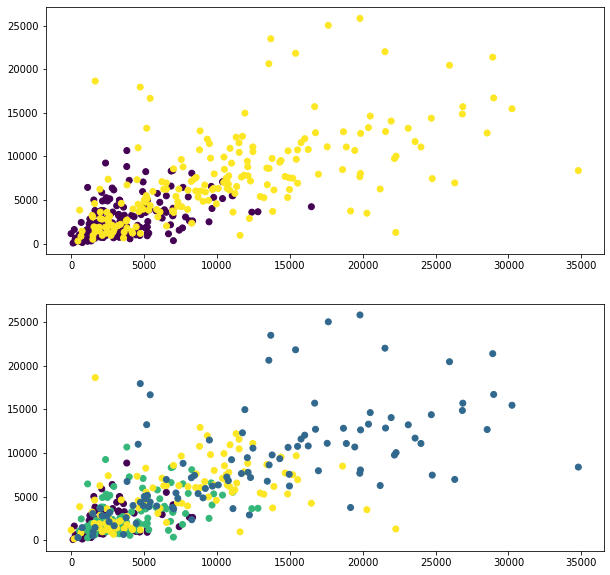

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_AC` respectively

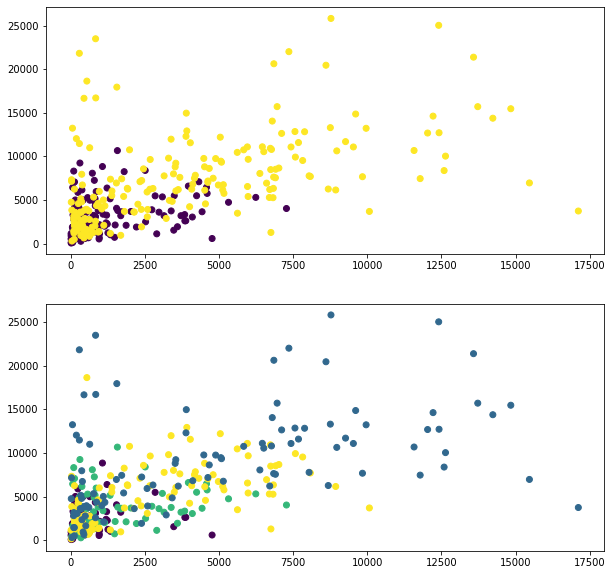

In [212]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1) 
plt.scatter(x = customers_sinOL.Detergents_Paper, y = customers_sinOL.Milk, c=customers_sinOL.labels_AC)

plt.subplot(2, 1, 2)
plt.scatter(x = customers_sinOL.Detergents_Paper, y = customers_sinOL.Milk, c=customers_sinOL.labels);

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_AC` respectively

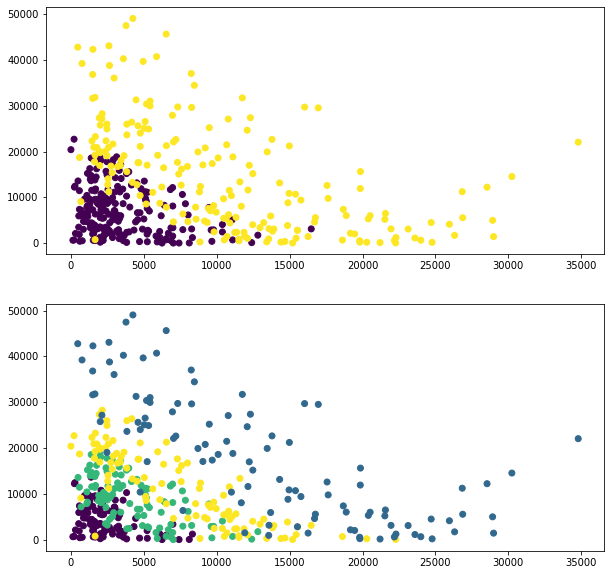

In [213]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1) 
plt.scatter(x = customers_sinOL.Grocery, y = customers_sinOL.Fresh, c=customers_sinOL.labels_AC)

plt.subplot(2, 1, 2)
plt.scatter(x = customers_sinOL.Grocery, y = customers_sinOL.Fresh, c=customers_sinOL.labels);


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_AC` respectively

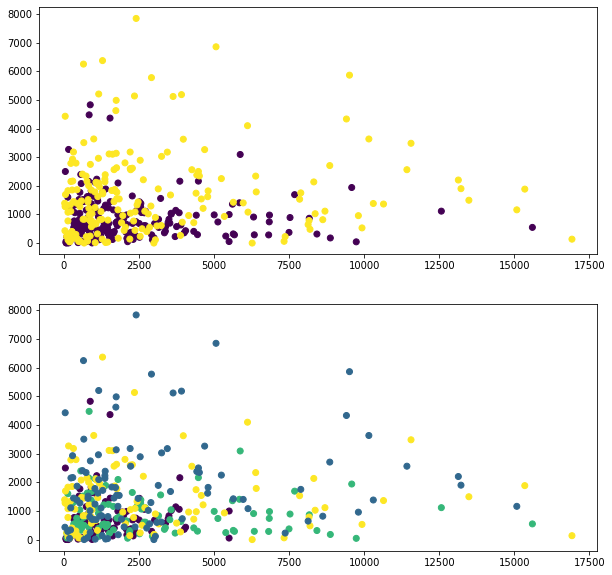

In [214]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1) 
plt.scatter(x = customers_sinOL.Frozen, y = customers_sinOL.Delicassen, c=customers_sinOL.labels_AC)

plt.subplot(2, 1, 2)
plt.scatter(x = customers_sinOL.Frozen, y = customers_sinOL.Delicassen, c=customers_sinOL.labels);

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_AC` respectively and compute the means for all columns.

In [215]:
customers_sinOL.groupby('labels_AC').mean()[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicassen']]

,Fresh,Milk,Grocery,Frozen,Delicassen
labels_AC,,,,,
0,6857.186916,2547.528037,3436.696262,2135.369159,818.518692
1,14836.150000,7359.020000,10427.805000,2993.445000,1686.720000


Which algorithm appears to perform better?

In [216]:
customers_sinOL.groupby('labels').mean()[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicassen']]

,Fresh,Milk,Grocery,Frozen,Delicassen
labels,,,,,
0,4370.844660,1932.058252,2381.834951,1387.572816,727.873786
1,18132.552381,9074.561905,12998.095238,3081.723810,1920.866667
2,8858.352941,3073.784314,4272.205882,2910.245098,868.372549
3,11317.317308,5304.019231,7453.076923,2810.692308,1416.067308


# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with AgglomerativeClustering because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing AgglomerativeClustering linkage criteria

Experiment changing the linkage param in AgglomerativeClustering.

In [ ]:
# Your code here

In [ ]:
# Your comment here